In [1]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("heart.csv")

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


#### age-age of patient
#### sex-male of female
#### chest pain type (4 values)
#### resting blood pressure of patient
#### serum cholestoral in mg/dl
#### fasting blood sugar > 120 mg/dl
#### resting electrocardiographic results (values 0,1,2)
#### maximum heart rate achieved
#### exercise induced angina
#### oldpeak = ST depression induced by exercise relative to rest
#### the slope of the peak exercise ST segment
#### number of major vessels (0-3) colored by flourosopy
#### thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## no null values in the data set

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

<Axes: >

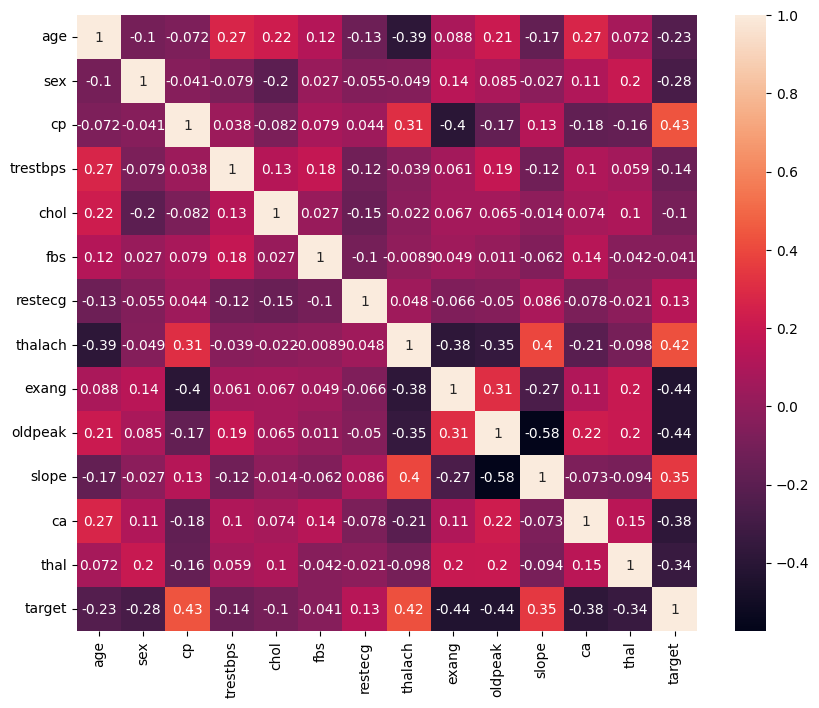

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.select_dtypes(exclude='object').corr(), cmap="rocket",annot = True)

### Their is not any strong correlation between two feature in the given dataset

<Axes: xlabel='age', ylabel='Count'>

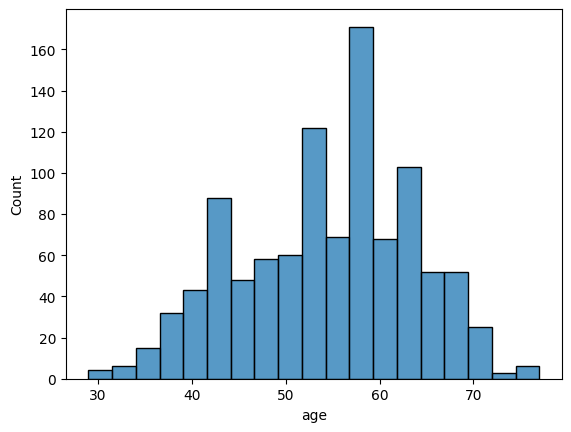

In [9]:
sns.histplot(df["age"])

### age is normally distributed

<Axes: xlabel='trestbps', ylabel='Count'>

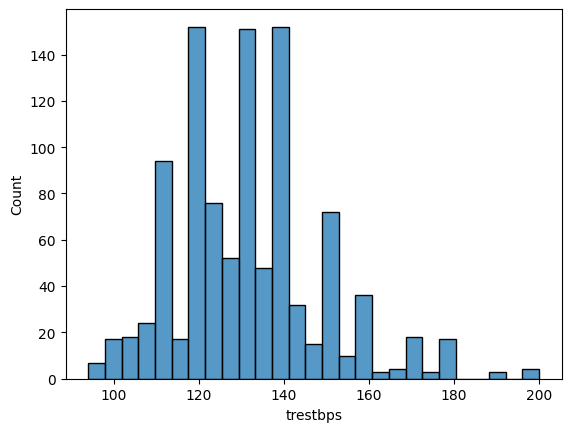

In [10]:
sns.histplot(df["trestbps"])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Text(0.5, 1.0, 'target')

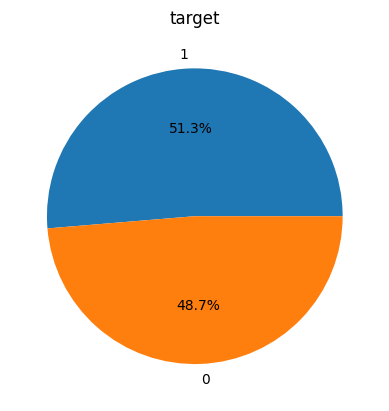

In [12]:
target_dist=df["target"].value_counts()
plt.pie(target_dist,labels=target_dist.index,autopct='%1.1f%%')
plt.title("target")

# In the given dataset half people has disease and half doesn't

Text(0.5, 1.0, 'Distribution of target with Sex\n 0-male,1-female')

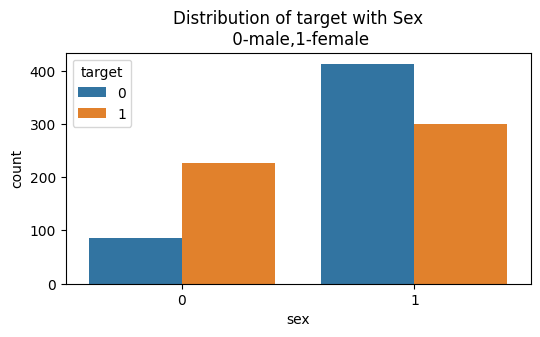

In [13]:
plt.figure(figsize=(6,3))
sns.countplot(data=df,x='sex',hue='target')
plt.title("Distribution of target with Sex\n 0-male,1-female")

In [14]:
###

### Man has more heart disease as compare to women

# Train Test split and scaling 
                              

In [15]:
Y=df["target"]

In [16]:
X=df.drop('target',axis=1)

In [17]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.25,random_state=2)

In [19]:
from sklearn.preprocessing import StandardScaler

stand_scale= StandardScaler()

In [20]:
 X_train=stand_scale.fit_transform(X_train)
 X_test=stand_scale.transform(X_test)

# Modeling

### Logistic Regression

In [21]:
m1="Logistic Regression"
lr_model = LogisticRegression(solver="liblinear",random_state=2 )
lr_model.fit(X_train, Y_train)
X_train_prediction = lr_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

X_test_prediction = lr_model.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_lr*100)

LR_conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confussion matrix")
print(LR_conf_matrix)

Accuracy on Training data:  84.89583333333334
Accuracy on Test data:  82.87937743190662
Confussion matrix
[[102  36]
 [  8 111]]


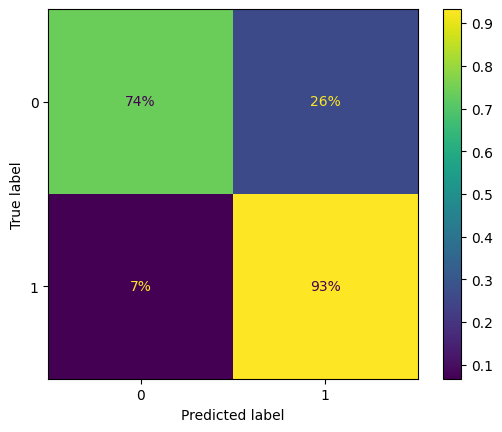

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,log_loss, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,classification_report
ConfusionMatrixDisplay.from_predictions( Y_test, X_test_prediction, normalize="true", values_format=".0%")


### Naive Bayes

In [23]:
from sklearn.naive_bayes import GaussianNB
m2="Naive Bayes"

nb = GaussianNB()
# training the model with training data
nb.fit(X_train,Y_train)
# Accuracy on training data
X_train_prediction = nb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = nb.predict(X_test)
test_data_accuracy_nb = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_nb*100)

#Confussion matrix
nb_conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confussion matrix")
print(nb_conf_matrix)

Accuracy on Training data:  84.11458333333334
Accuracy on Test data:  82.87937743190662
Confussion matrix
[[106  32]
 [ 12 107]]


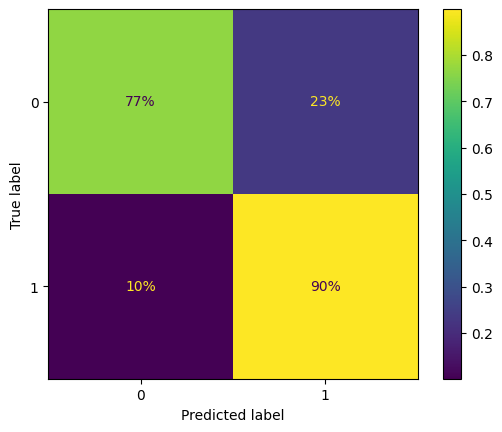

In [24]:

ConfusionMatrixDisplay.from_predictions( Y_test, X_test_prediction, normalize="true", values_format=".0%")


### Random Forest

In [25]:
m3="Random Forest"
rf = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=7, min_samples_leaf=2, max_features="sqrt",random_state=2)  
# training the model with training data
rf.fit(X_train,Y_train)
# Accuracy on training data
X_train_prediction = rf.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)

# Accuracy on test data
X_test_prediction = rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_rf*100)

#Confussion matrix
rf_conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confussion matrix")
print(rf_conf_matrix)

Accuracy on Training data:  98.828125
Accuracy on Test data:  94.94163424124513
Confussion matrix
[[129   9]
 [  4 115]]


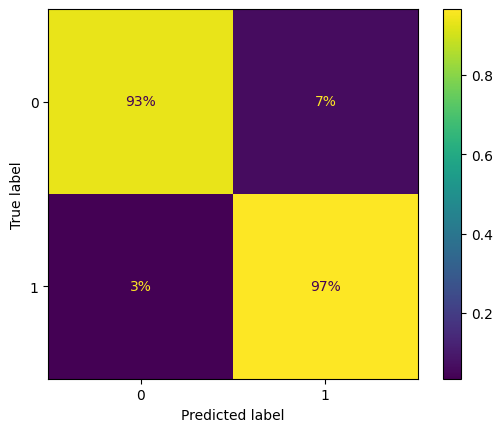

In [26]:
ConfusionMatrixDisplay.from_predictions( Y_test, X_test_prediction, normalize="true", values_format=".0%")


### Extreme Gradient Boost

In [27]:
m4="Extreme Gradient Boost"
Egb = GradientBoostingClassifier(n_estimators=100, subsample= 0.2, min_samples_leaf=2,max_depth=5,random_state=2,max_features="sqrt")
# training the model with training data
Egb.fit(X_train,Y_train)
# Accuracy on training data
X_train_prediction = Egb.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_prediction = Egb.predict(X_test)
test_data_accuracy_egb = accuracy_score(X_test_prediction, Y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_egb*100)

#Confussion matrix
Egb_conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confussion matrix")
print(Egb_conf_matrix)

Accuracy on Training data:  100.0
Accuracy on Test data:  97.27626459143968
Confussion matrix
[[134   4]
 [  3 116]]


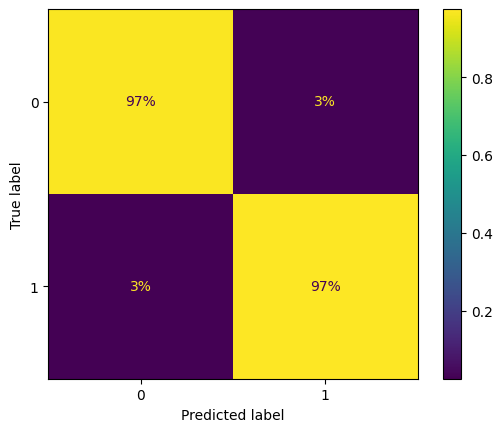

In [28]:
ConfusionMatrixDisplay.from_predictions( Y_test, X_test_prediction, normalize="true", values_format=".0%")


### K-Neighbour

In [29]:
from sklearn.neighbors import KNeighborsClassifier
m5="K-Neighbour"
knn = KNeighborsClassifier(n_neighbors=20, algorithm="auto" )
# train on the training set
knn.fit(X_train, Y_train)
# Accuracy on training data
X_train_predict= knn.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, Y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= knn.predict(X_test)
test_data_accuracy_knn=accuracy_score(X_test_predict, Y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_knn*100)
#Confussion matrix
knn_confusion_matrix=  confusion_matrix(Y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  85.80729166666666
Accuracy on Test data:  85.99221789883269
Confusion Matrix
[[115  23]
 [ 13 106]]


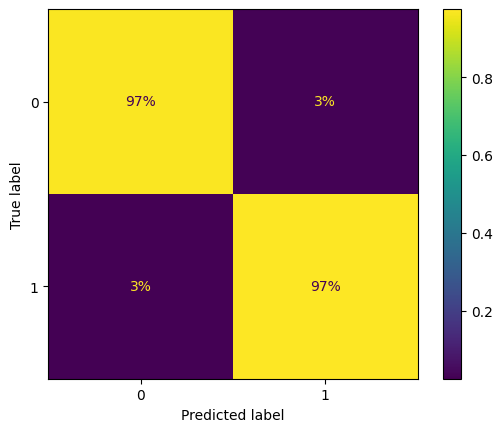

In [30]:
ConfusionMatrixDisplay.from_predictions( Y_test, X_test_prediction, normalize="true", values_format=".0%")


### XGB

In [31]:
from xgboost import  XGBClassifier
m6="XGB"
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
# Accuracy on training data
X_train_predict= xgb.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, Y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= xgb.predict(X_test)
test_data_accuracy_xgb=accuracy_score(X_test_predict, Y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_xgb*100)
#Confussion matrix
knn_confusion_matrix=  confusion_matrix(Y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  100.0
Accuracy on Test data:  97.27626459143968
Confusion Matrix
[[134   4]
 [  3 116]]


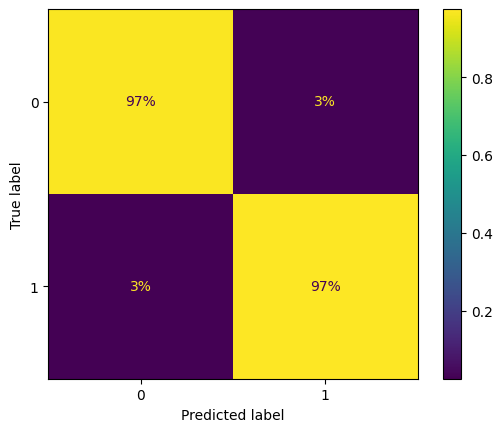

In [32]:
ConfusionMatrixDisplay.from_predictions( Y_test, X_test_prediction, normalize="true", values_format=".0%")


### svc

In [33]:
from sklearn.svm import SVC
m7="svc"
svc = SVC(C=5,kernel="rbf")
svc.fit(X_train, Y_train)
# Accuracy on training data
X_train_predict= svc.predict(X_train)
training_data_accuracy=accuracy_score(X_train_predict, Y_train)
print(f"Accuracy on Training data: ",training_data_accuracy*100)
# Accuracy on test data
X_test_predict= svc.predict(X_test)
test_data_accuracy_svc=accuracy_score(X_test_predict, Y_test)
print(f"Accuracy on Test data: ",test_data_accuracy_svc*100)
#Confussion matrix
knn_confusion_matrix =  confusion_matrix(Y_test,X_test_predict)
print("Confusion Matrix")
print(knn_confusion_matrix)

Accuracy on Training data:  98.95833333333334
Accuracy on Test data:  94.55252918287937
Confusion Matrix
[[127  11]
 [  3 116]]


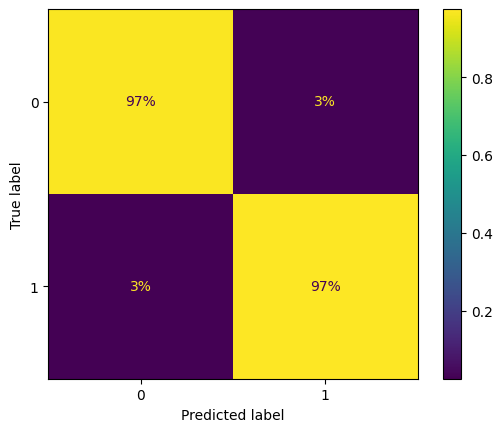

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,log_loss, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score,classification_report
ConfusionMatrixDisplay.from_predictions( Y_test, X_test_prediction, normalize="true", values_format=".0%")


### comparision of all models

In [35]:
results = {"Models": [m1, m2, m3 ,m4, m5, m6,m7],
           "Accuracy": [test_data_accuracy_lr, test_data_accuracy_nb, test_data_accuracy_rf,test_data_accuracy_egb, test_data_accuracy_knn, test_data_accuracy_xgb, test_data_accuracy_svc]}
    
for (key, value) in results.items():
    if key=="Accuracy":
        results[key]=  [item*100 for item in results[key]]

    
result_df=pd.DataFrame(results)

In [36]:
result_df

,Models,Accuracy
0,Logistic Regression,82.879377
1,Naive Bayes,82.879377
2,Random Forest,94.941634
3,Extreme Gradient Boost,97.276265
4,K-Neighbour,85.992218
5,XGB,97.276265
6,svc,94.552529


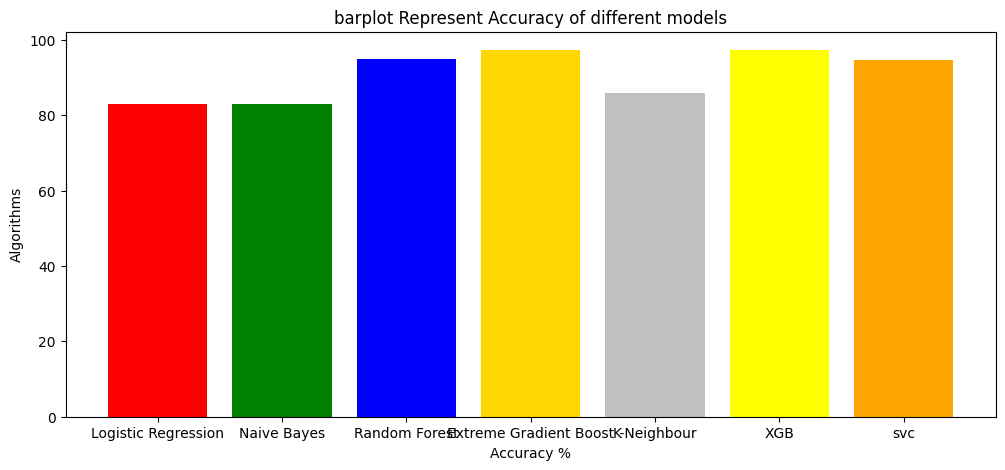

In [37]:
%matplotlib inline
colors = ['red','green','blue','gold','silver','yellow','orange',]
plt.figure(figsize=(12,5))
plt.title("barplot Represent Accuracy of different models")
plt.xlabel("Accuracy %")
plt.ylabel("Algorithms")
plt.bar(result_df['Models'],result_df['Accuracy'],color = colors)
plt.show()

# xgboost classifier model give us the 97% accurate result 

# now apply the hyperperameter tuning of xgboost model

In [38]:
import optuna
Random_s=np.random.seed(30)
def objective(trial):
    params = {
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        'min_child_weight': trial.suggest_int('min_child_weight', 0.01, 1),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1),
        'eval_metric':trial.suggest_categorical('eval_metric', ['mlogloss']),
    }

    optuna_xgbmodel=XGBClassifier(**params, random_state=Random_s)
    optuna_xgbmodel.fit(X_train,Y_train)
    Y_pred_prob=optuna_xgbmodel.predict_proba(X_test)
    logloss=log_loss(Y_test,Y_pred_prob)
    return logloss
study=optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50,show_progress_bar=True)

[I 2024-01-09 19:49:02,574] A new study created in memory with name: no-name-f8aec944-ec31-4945-89fd-7b810a433d66


  0%|          | 0/50 [00:00<?, ?it/s]

[I 2024-01-09 19:49:03,011] Trial 0 finished with value: 0.24240135415218675 and parameters: {'booster': 'gbtree', 'max_depth': 3, 'learning_rate': 0.02876611484033656, 'n_estimators': 616, 'min_child_weight': 1, 'subsample': 0.15824595774054245, 'colsample_bylevel': 0.7998263117424057, 'colsample_bytree': 0.3918654703833452, 'colsample_bynode': 0.8039834052114103, 'reg_alpha': 0.21916749500913973, 'reg_lambda': 0.7377755849328055, 'eval_metric': 'mlogloss'}. Best is trial 0 with value: 0.24240135415218675.
[I 2024-01-09 19:49:03,593] Trial 1 finished with value: 0.08115596912806047 and parameters: {'booster': 'gbtree', 'max_depth': 7, 'learning_rate': 0.0399709221453855, 'n_estimators': 546, 'min_child_weight': 0, 'subsample': 0.6573624372411595, 'colsample_bylevel': 0.3584652601517896, 'colsample_bytree': 0.713329814731531, 'colsample_bynode': 0.685031429297574, 'reg_alpha': 0.012895293491771207, 'reg_lambda': 0.5046161456938578, 'eval_metric': 'mlogloss'}. Best is trial 1 with value

In [39]:
print("best hypertuning", study.best_params)
print("log loss" , study.best_value)

best hypertuning {'booster': 'gbtree', 'max_depth': 11, 'learning_rate': 0.05413763654342785, 'n_estimators': 569, 'min_child_weight': 0, 'subsample': 0.953786584120994, 'colsample_bylevel': 0.6811195409977988, 'colsample_bytree': 0.5011009216565342, 'colsample_bynode': 0.8664555837805419, 'reg_alpha': 0.3165966244077707, 'reg_lambda': 0.06234449817408756, 'eval_metric': 'mlogloss'}
log loss 0.060288654172748764


In [40]:
parameters= study.best_params
xgb_model_2=XGBClassifier(**parameters,random_state=Random_s)
xgb_model_2.fit(X_train,Y_train)


XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=0.6811195409977988,
              colsample_bynode=0.8664555837805419,
              colsample_bytree=0.5011009216565342, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05413763654342785,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=0, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=569, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
peredtic = xgb_model_2.predict(X_test)
print("accuracy score =",accuracy_score(Y_test,peredtic))
print('precision score =', precision_score(Y_test,peredtic,average='weighted'))
print("Recall =",recall_score(Y_test,peredtic,average='weighted'))


accuracy score = 0.9727626459143969
precision score = 0.9728071421132855
Recall = 0.9727626459143969


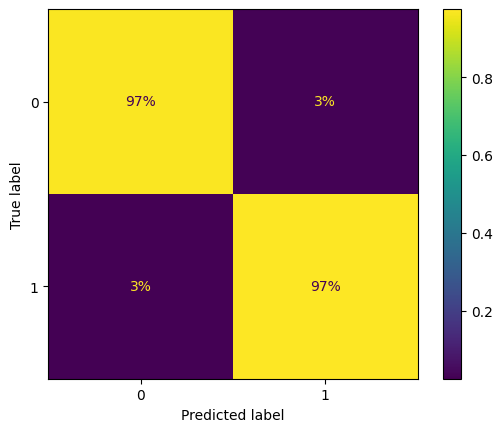

In [42]:
ConfusionMatrixDisplay.from_predictions( Y_test, peredtic, normalize="true", values_format=".0%")
plt.show()

# Conclusion

## I have the dataset of some heart patient which have 13 feature  and 1 target column. Target column of my dataset have two category either the person has diesese or don't have the disease. My data set don't have any null values and outliers. None of the feature depends on other. I use the train test split to split the data into to part for training and testing the model.I use 7 model ( logestic regression,navie bayes,random forest,Extreme gradient boost,K-Neighbour,XGBoost,SVC) and i calculate the accuracy of each model.I found the on the given data set XGBoost model give us the best result with 97% accuracy. to improve the performance of model i use hyperperameter tuning and it slightly improve the accuracy of the model 